# Lecture 21: k-nearest neighbors classification

## Reading: Bayesian classification

What we have learned in Lecture 18 and 19, the logistic regression and softmax regression, are two classification methods that are closely related to Bayesian classifiers. Because essentially, we are trying minimize the following the error associated with a set of observations of the form in a way (by introducing some model with weights):

$$
\min_{\mathbf{w}} \Big[\text{Mean of } 1\big\{y^{(i), \text{Pred}} \neq y^{(i), \text{Actual}} \big\} \Big],
$$

If there is no model yet, let $K= \# \text{ classes}$. Keep in mind for now there are no weights involved, we simply want to classify the samples into $K$ classes, so that the minimization of problem above is *assigning each sample to the most likely class it belongs to*, given its values (feature vector), i.e., we want to compute

$$
\max_{j\in \{1,\dots ,K\}} P\big(y^{(i)}=j | \mathbf{x}^{(i)} \big)  \tag{$\diamond$}
$$

where $P\big(y^{(i)}=j | \mathbf{x}^{(i)} \big)$ is the conditional probability that the label $y^{(i)}=j$ (the $i$-th sample is in the $j$-th class), given the observed vector $\mathbf{x}^{(i)}$ for the $i$-th sample. This is called the naive Bayes classifier. 

----

### Naive Bayes classifier

Using the definition of the conditional probability: for an arbitrary sample and its label $(\mathbf{x},y)$

$$
P(y=j | \mathbf {x} )={\frac { P( y = j, \mathbf {x})}{P(\mathbf {x} )}} \tag{$\ast$}
$$

Assuming $\mathbf{x} = (x_1, x_2, \dots, x_n)$, i.e., each sample has $n$ features, then the numerator above is 
$ P(y=j)\ P(\mathbf {x} | y = j)$, where $P(y=j)$ is the probability that an arbitrary sample is of class $j$ without any observation $\mathbf{x}$, i.e., $P(y=j)$ is the portion of class $j$ against all all samples. Now using the definition of conditional probability again:

$$
\begin{aligned}
P(y=j,x_{1},\dots ,x_{n}) &= P(x_{1},\dots ,x_{n},y=j)
\\
&= P(x_{1} | x_{2},\dots ,x_{n},y=j) P(x_{2},\dots ,x_{n},y=j)
\\
&= P(x_{1} | x_{2},\dots ,x_{n},y=j) P(x_{2} | x_{3},\dots ,x_{n},y=j) P(x_{3},\dots ,x_{n},y=j)
\\&=\dots 
\\&= P(x_{1} |  x_{2},\dots ,x_{n},y=j) P(x_{2} | x_{3},\dots ,x_{n},y=j)
\dots P(x_{n-1} | x_{n},y=j) P(x_{n}| y=j)P(y=j)\\
\end{aligned} \tag{$\ast\ast$}
$$

Assuming each feature is independent from one another, which means whether put $x_l$ ($l\neq i$) into the given observed conditions does not affect the probability of $x_i$:
$$
P(x_{i} | x_{i+1},\dots ,x_{n}, y =j) = P(x_{i}| y=j).
$$

Since $P(\mathbf{x}) = 1/N$ is a fixed value (assuming uniform distributed sample), we have by $(\ast)$ and $(\ast\ast)$

$$
\begin{aligned}
P(y=j | x_{1},\dots ,x_{n}) &\propto P(y=j,x_{1},\dots ,x_{n})
\\
&=P(y=j)\ P(x_{1} | y=j)\ P(x_{2}| y=j)\ P(x_{3} | y=j)\ \cdots 
\\
&=P(y=j)\prod_{i=1}^{n}P(x_{i}| y=j),
\end{aligned}
$$

Now for training sample $\mathbf{x}^{(i)}$, the problem becomes:

$$
y^{(i), \text{Pred}}={\underset {j\in \{1,\dots ,K\}}{\operatorname {argmax} }}\ P(y = j)\displaystyle \prod _{i=1}^{n} P(x_{i} | y=j),
$$

where $y^{(i), \text{Pred}}$ is the class which the probability $(\diamond)$ is maximized.

----

### Pitfalls of naive Bayes classifier

In reality, there are two main reasons the method above is neither practical nor reasonable.

* there is no way $x_i$ and $x_l$ are independent when $i\neq l$ for a sample $\mathbf{x}$. Think in the handwritten digit classification example, $x_i$'s are the pixel intensity at $i$-th location (one of the pixel among 28x28 reshaped into a 784 array), any reasonable ansatz should not assume independency, because the pixel intensity are determined by the strokes.
* For real data, we do not know $P(y=j)$'s true value, i.e., percentage of the samples in class $k$, because new data may come in. For the same reason $P(x_{i} | y=j)$ is not known either.

Therefore, we introduce a model (an a priori assumption that the data can be described by such a model) with weights $\mathbf{w}$, and the problem changes to (softmax case) the following maximization of the log of the likehood function (or say cross entropy),
$$
\max_{\mathbf{w}}\sum_{i=1}^N \left\{\sum_{j=1}^K
 1_{\{y^{(i)} = j\}} \ln P\big(y^{(i)}=j | \mathbf{x}^{(i)} ; \mathbf{w} \big) \right\},
$$
in Lecture 18 and 19, we have tried using gradient descent to minimize the negative version of above.

# $k$-nearest neighbors ($k$NN) classifier

Another simple classifier adopting Bayesian thinking (a posteriori, without assuming a priori any model) is kNN. kNN can be thought as an approximation to the naive Bayes classifier. We will try to estimate the conditional probability of $y=j$ given training/testing sample $\mathbf{x}$ for each $j=1,\dots, K$, and then classify a given training/testing to the class with highest *estimated* probability, opposing to actually computing this probability in the naive Bayes classification.

Given a $k$ (different from the index for the class) and a test sample $\mathbf{x}^{(0)}$, the kNN classifier first identifies the neighbors $k$ points in the training data that are closest to $\mathbf{x}^{(0)}$, whose indices are represented by $\mathcal{N}_0$. It then estimates the conditional probability for class $j$ by computing the fraction of points in $\mathcal{N}_0$ whose target values (label) actually equal $j$:

$$
P\big(y= j| \mathbf{x}^{(0)} \big)\approx  \frac{1}{k} \sum_{i\in \mathcal{N}_0} 1\{ y^{(i)} = j\}.
$$

Finally, kNN applies Bayesian rule and classifies the test sample $\mathbf{x}^{(0)}$ to the class with the largest estimated probability. Despite the fact that it is a very simple approach, kNN can often produce classifiers that are surprisingly close to the optimal naive Bayes classifier.

----

### Implementation of $k$NN

Even the formulation above is pretty mathematical, the algorithm reads very simple as follows:

> Step 1: Assign a distance metric to the training samples $\{\mathbf{x}^{(i)} \}_{i=1}^N$ ($L^2$, $L^1$, $L^{\infty}$, etc), and choose the number of neighbors $k$<br>
> Step 2: For the new data sample, take the $k$ nearest neighbors of this sample in $\{\mathbf{x}^{(i)} \}_{i=1}^N$, according to the distance metric.<br>
> Step 3: Among these $k$ neighbors, count the number of data samples in each class.<br>
> Step 4: Assign this new data sample to the class where the most neighbors are counted.

Remark: To avoid tie situations, we note that $k$ is usually odd.

## A famous example: classify flowers using the lengths of petals/sepals

The data set we are using is the [Iris Flower Dataset (IFD)](https://archive.ics.uci.edu/ml/datasets/Iris), or you can download from [UCI machine learning repo on Kaggle](https://www.kaggle.com/uciml/iris). Here we will use `scikit-learn`'s dataset module to import it

IFD was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals. Our goal is to train a kNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.

In the in-class presentation, we will use `scikit-learn`'s built-in kNN classifier. A full implementation using `numpy` is the in the end of this notebook for you to read.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# if we load the raw Iris.csv, we have to pre-process the data
iris_data = pd.read_csv('Iris.csv')
iris_data[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


First we drop the `Id` column using the [drop function](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.drop.html) in pandas Dataframe class, and visualize the dataset using `seaborn`.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


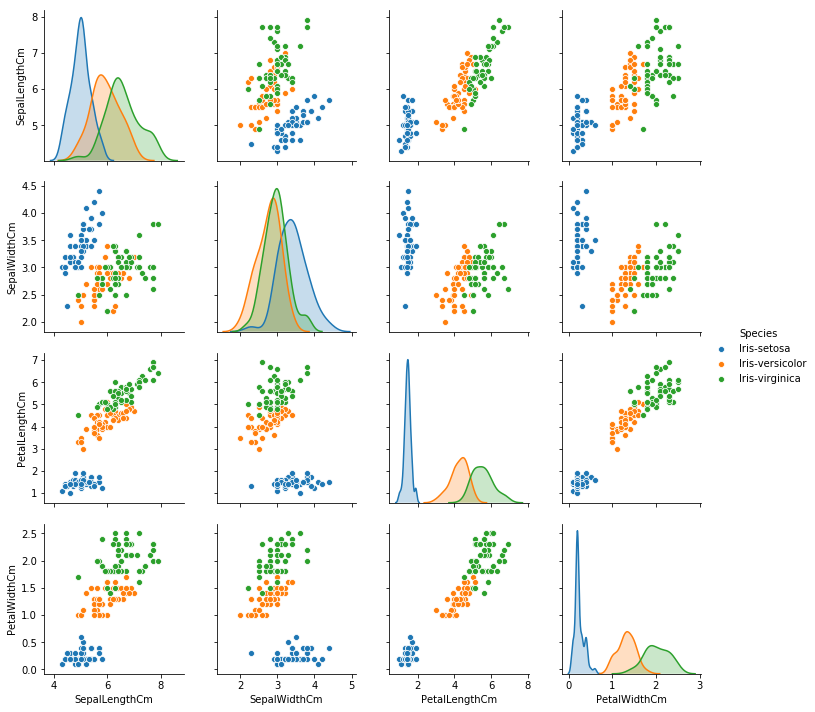

In [3]:
# visualizing using seaborn
sns.pairplot(iris_data.drop(labels = ['Id'], axis=1), hue='Species')  # dropping the Id column
plt.show()

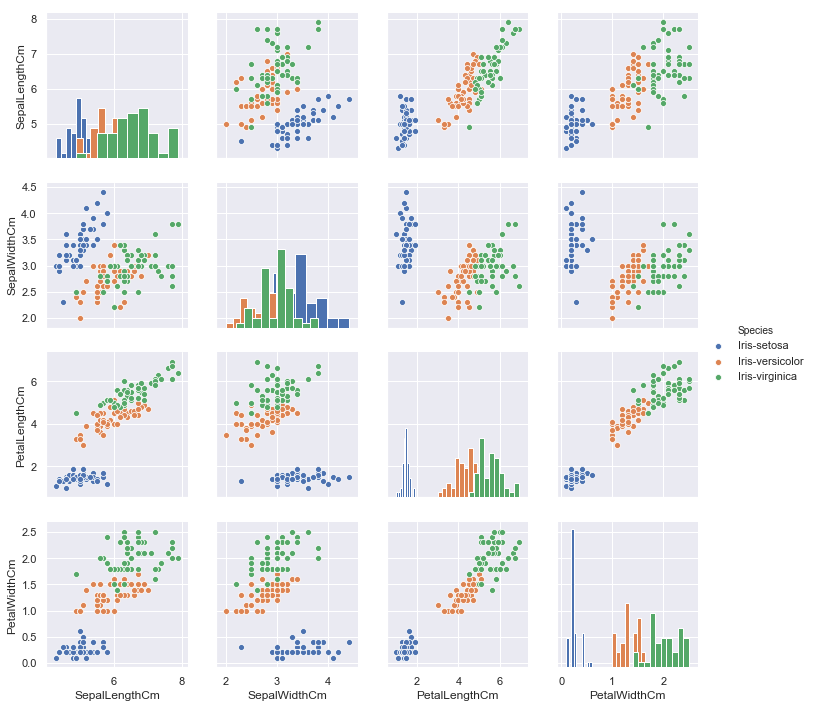

In [4]:
sns.set()
sns.pairplot(iris_data.drop(labels = ['Id'], axis=1), diag_kind='hist', hue='Species')  # dropping the Id column
plt.show()

## Scikit-learn's version

Below we load the data from `scikit-learn`, since the label is already pre-processed as numbers.

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data_proc = load_iris()
iris_data_proc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
iris_data_proc.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [6]:
iris_data_proc.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X, y = iris_data_proc.data, iris_data_proc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## kNN from scikit-learn

In [8]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# instantiate learning model (k = 5)
iris_knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
# fitting the model
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# predict the response
y_pred = iris_knn.predict(X_test)

In [13]:
y_pred[:10]

array([2, 1, 2, 1, 1, 2, 0, 0, 0, 1])

In [14]:
# evaluate accuracy
print("The testing accuracy is: ", np.mean(y_test == y_pred))

The testing accuracy is:  0.9666666666666667


# In-class exercise:

* Read the [reference of `KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
* Try different number of `n_neighbors` (odd numbers), what have you observed.
* There is an option `weights ='distance'` in the `KNeighborsClassifier` class, try it.

# Implement the $k$NN algorithm

Following the main working pipeline we have seen in regression, we need to implement the following three components:

* Model: choose the distance metric we want to use, choose $k$
* Training: do nothing, just store the data.
* Testing/Cross-validate: compute the distance between a testing sample and all training samples. Sorting and get the $k$ nearest neighbors, and perform a majority to determine the class.

### Distance choosing
The most commonly used is the Euclidean distance ($L^2$-distance):
$$
d(\mathbf{x}, \mathbf{x}') = \sqrt{(x_1 - x'_1 )^2 + (x_2 - x'_2 )^2 + \dots + (x_n - x'_n )^2},
$$
for other distances, please refer to [the DistanceMetric class in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html). The next popular one is Manhattan distance ($L^1$-distance), which performs much better than $L^2$ in high dimension (the data point has many features).

First we notice that sorting the $L^2$ distance $d(\mathbf{x}, \mathbf{x}')$ is like sorting the distance squared, so we do not have to take square root just to save some time.

In [20]:
# a simple kNN implementation
M = len(y_test)
N = len(y_train)
k = 5 # no. of neighbors to a testing sample
y_pred = np.zeros(M, dtype = int) # the prediction of the labels
for j in range(M):
    dist_j = np.zeros(N)
    # initialization: dist_j stores the distances of j-th testing sample to all training samples
    for i in range(N):
        dist_j[i] = np.sum((X_test[j,:] - X_train[i,:])**2)
        # dist_j[i] is the distance of j-th testing sample to i-th training sample
    idx_knn = np.argsort(dist_j)[:k] # return the indices of k nearest neighbors
    # X_train[idx_knn[0], :] will be the training sample that is closest to j-th testing sample
    label_neighbor = y_train[idx_knn]
    # y_train[idx_knn] is the labels of these k nearest neighbor
    label_neighbor, count_label = np.unique(label_neighbor, return_counts=True)
    # count_label: how many time a certain labeled samples appear as in the k nearest neighbors
    y_pred[j] = label_neighbor[np.argmax(count_label)]
    # np.argmax(count_label) returns the index of the label appearing 
    
# evaluate accuracy
print("The testing accuracy is: ", np.mean(y_test == y_pred))

The testing accuracy is:  0.9666666666666667


In [23]:
# examples of argsort vs sort
arr = np.array([1, 0, 5, 19, 12, 3])

In [25]:
np.sort(arr) # returns the sorted array

array([ 0,  1,  3,  5, 12, 19])

In [24]:
np.argsort(arr) # returns the indices of the sorted entry
# the first entry 1 means element 1 in arr is 0, the smallest entry
# the second entry 0 means element 0 in arr is 1, the second smallest entry
# the j-th entry in the argsort means element j in arr is the j-th smallest entry

array([1, 0, 5, 2, 4, 3], dtype=int64)

In [16]:
count_label

array([5], dtype=int64)

In [19]:
# an example of np.unique
label_neighbor, count_label = np.unique([2, 1, 1, 1, 1, 1, 0, 0], return_counts=True)
print(label_neighbor) # the unique labels in the array
print(count_label) # how many times each labels appearing in the array

[0 1 2]
[2 5 1]


In [18]:
np.argmax(count_label) # the most frequent label

1

## Reading: Vectorization of kNN
A common way to implement $k$NN is to run a `for` loop for all testing samples. In $i$-th iteration of the loop, the distances between the $i$-th testing sample and all training samples are computed and sorted, so that we can choose the $k$-smallest distance neighbors. This is highly un-vectorized, and not recommended for large dataset.

Instead we consider the problem in bulk, suppose we have $n$ features in our dataset: we need to find the $L^2$-distance squared between the a set of test vectors (representing the testing samples), stored in array `X_test` of shape `(M,n)`, and a set of training vectors (representing the training samples), held in a matrix `X_train` of shape `(N,n)`. Our goal is to create a distance matrix `D` of shape `(M,N)` that stores the $L^2$-distance squared from every test vector to every training vector, for example `D[j,i]` shall return the distance squared between the $j$-th testing sample and the $i$-th training sample, and `D[j,:]` the $j$-th row of `D` stores the distance squared between the $j$-th testing sample and all training samples.

To do this in a vectorized way, a simple for $L^2$ distance is using $|x-x'|^2 = x^2 -2xx' + x'^2$. A vectorized implementation with no `for` loop iterating around all testing samples is in the following cell, for moderate dataset like MNIST, the performance is about several hundred times faster than using `for` loop.

In [26]:
# Dist[j,i] is the np.sum((X_test[j,:] - X_train[i,:])**2)
Dist = -2 * np.dot(X_test, X_train.T) + np.sum(X_train**2, axis=1) + np.sum(X_test**2, axis=1).reshape(-1,1)
# try testing each term's shape in a new cell and ponder about this implementation
# notice np.sum(X_test**2, axis=1).reshape(-1,1) is the same with np.sum(X_test**2, axis=1)[:, np.newaxis]

In [27]:
# now the implementation is almost the same with above
k = 5 # k nearest neighbors
K = 3 # K classes
idx_knn = Dist.argsort(axis = 1)[:,:k] # sort by columns for each row, then return the first k columns
knn_label = y_train[idx_knn]
# the vectorized version takes some tricks
count_label = np.zeros((len(y_test), K), dtype = int)
for j in range(K): # a small for loop iterating on classes
    count_label[:,j] = np.sum((knn_label==j), axis=1)
y_pred = np.argmax(count_label, axis=1)

# evaluate accuracy
print("The testing accuracy is: ", np.mean(y_test == y_pred))

The testing accuracy is:  0.9666666666666667


Some cells below are for you to figure out what happened above.

In [ ]:
np.sum(X_test**2, axis=1).reshape(-1,1).shape

In [ ]:
np.dot(X_test, X_train.T).shape

In [ ]:
np.sum(X_train**2, axis=1).shape

In [ ]:
y_train[idx_knn][:10,:]

In [ ]:
count_label[:10,]